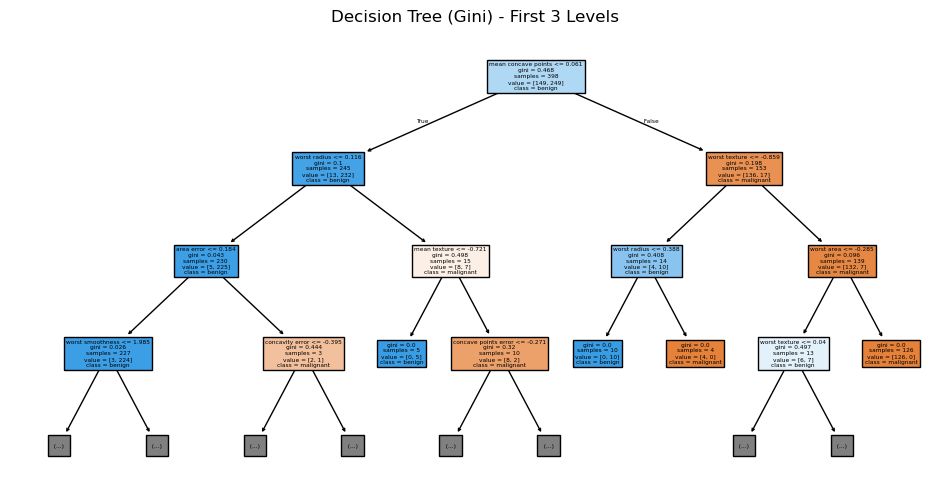

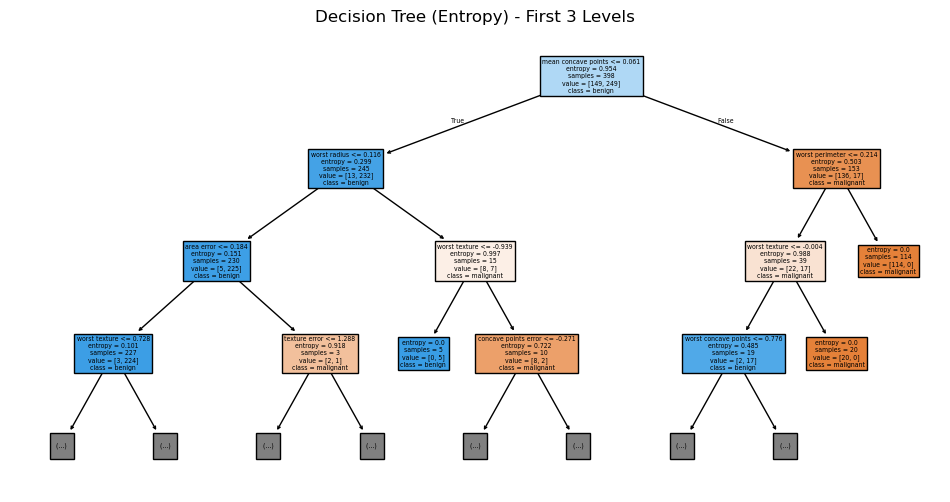

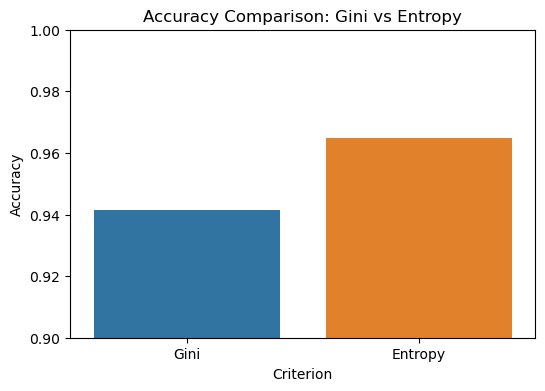

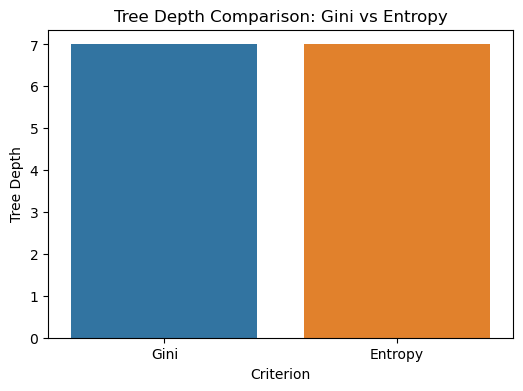

  Criterion  Accuracy  Tree Depth
0      Gini  0.941520           7
1   Entropy  0.964912           7


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Initialize classifiers
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit models
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

# Predict on test data
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate models
acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)
depth_gini = clf_gini.get_depth()
depth_entropy = clf_entropy.get_depth()

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Criterion': ['Gini', 'Entropy'],
    'Accuracy': [acc_gini, acc_entropy],
    'Tree Depth': [depth_gini, depth_entropy]
})

# Visualize decision trees (first 3 levels)
plt.figure(figsize=(12, 6))
plot_tree(clf_gini, filled=True, max_depth=3,
          feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree (Gini) - First 3 Levels")
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(clf_entropy, filled=True, max_depth=3,
          feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree (Entropy) - First 3 Levels")
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(6, 4))
sns.barplot(x="Criterion", y="Accuracy", data=comparison_df)
plt.title("Accuracy Comparison: Gini vs Entropy")
plt.ylim(0.9, 1.0)
plt.show()

# Plot tree depth comparison
plt.figure(figsize=(6, 4))
sns.barplot(x="Criterion", y="Tree Depth", data=comparison_df)
plt.title("Tree Depth Comparison: Gini vs Entropy")
plt.show()

# Show comparison data
print(comparison_df)
